### Latent ideology of users

LI is based on the media outlet shared by each user, therefore the ideology reflects the group of media an user shares.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 


np.random.seed(123459)

In [2]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers_with_article_info.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])
data['fecha'] = pd.to_datetime(data['fecha'])
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


### Encoding matrix user - media share
User - media shares dataframe based on one-hot encoding of media shares

In [3]:
user_media_df = pd.DataFrame()

# user_id column
user_media_df['usr_id'] = data['usr_id']

#creating instance of one-hot-encoder and one-hot encoding of media shares
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['medio']]).toarray())
encoder_df.columns = list(encoder.categories_[0])

user_media_df = user_media_df.join(encoder_df)

In [4]:
user_media_df = user_media_df.groupby('usr_id').sum()
user_media_df.head(n = 5)

,Ambito Financiero,Clarin,Contexto,Diario Registrado,El Cronista,El Destape,El Dia,El Litoral,Infobae,Jornada,La Izquierda Diario,La Nacion,Minuto Uno,Pagina 12,Perfil,Radio Dos,Radio Mitre,TYC Sports,Todo Noticias
usr_id,,,,,,,,,,,,,,,,,,,
12864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
624143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ppal_media = ['Clarin', 'La Nacion', 'Pagina 12', 'Todo Noticias', 'Infobae', 'El Destape']
ppal_media += ['Ambito Financiero', 'Minuto Uno', 'Perfil', 'El Cronista', 'Radio Mitre', 'El Dia']

user_media_df_filtrado = user_media_df[ppal_media].copy()
user_media_df_filtrado = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 0].copy()

In [6]:
# Matrix of user - media shared
A = user_media_df_filtrado.to_numpy()

In [7]:
score_users = np.random.normal(loc = 0, scale = 1.00, size = A.shape[0])
score_users = (score_users - np.mean(score_users))/np.std(score_users)

for iteration in range(50):
    
    score_media = np.array([np.average(score_users, weights=A[:,i]) for i in range(A.shape[1])])
    score_users = np.array([np.average(score_media, weights=A[j,:]) for j in range(A.shape[0])])

    score_users = (score_users - np.mean(score_users))/np.std(score_users)

In [8]:
score_media = np.array([np.average(score_users, weights=A[:,i]) for i in range(A.shape[1])])
media_score = [[user_media_df_filtrado.columns[i], score_media[i]] for i in range(len(score_media))]
print(media_score)

[['Clarin', 0.609661999211148], ['La Nacion', 0.5312879166183917], ['Pagina 12', -1.3626397807373856], ['Todo Noticias', 0.6419815284240711], ['Infobae', 0.39850498120660227], ['El Destape', -1.4959403799483069], ['Ambito Financiero', -0.5587326463353376], ['Minuto Uno', -1.291277582825876], ['Perfil', -0.05070000145797923], ['El Cronista', 0.11570807397797654], ['Radio Mitre', 1.3257852341732044], ['El Dia', 0.30968440723347196]]


[-1.75602129  0.8704686 ]


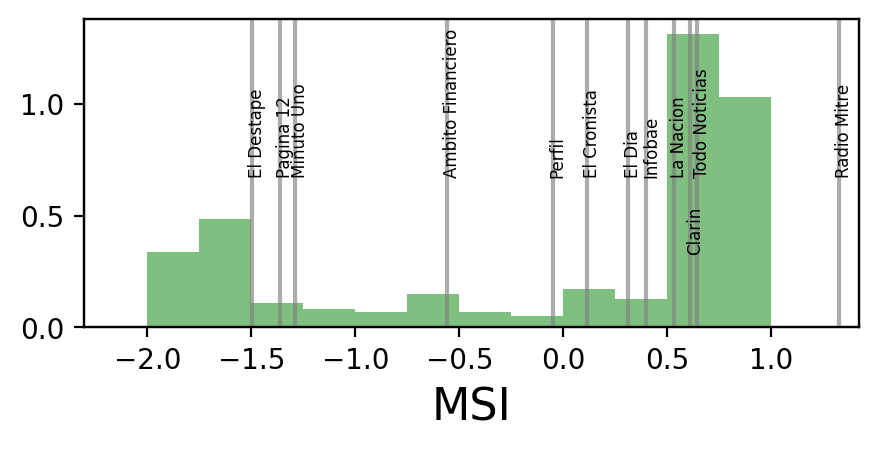

In [9]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))
ax.hist(score_users, bins = np.arange(-2.5, 2.51, 0.25), alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'MSI', size = 16)

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
ax.set_xlim(np.quantile(score_users, q = [0.005, 0.995]) + np.array([-0.55, 0.55]))
print(np.quantile(score_users, q = [0.005, 0.995]))
plt.show()

In [10]:
user_media_df_filtrado['score'] = score_users

### Ideology users

In [11]:
data_opinion = data[data.opinion_dinamic.isna() != True].copy()

In [12]:
data_opinion['opinion_valence'] = data_opinion.apply(lambda x: 1 if x['opinion_dinamic'] == 'MP' else -1, axis = 1)

In [13]:
user_valence = data_opinion.groupby('usr_id')['opinion_valence'].mean()

In [14]:
user_valence

usr_id
58613                  0.000000
760916                -1.000000
778189                 1.000000
780281                -1.000000
788034                -1.000000
                         ...   
1155206065123934208   -1.000000
1155457420652679168    1.000000
1155496275757998080    1.000000
1155580337990316035    0.655172
1155962950068461568    1.000000
Name: opinion_valence, Length: 31927, dtype: float64

In [15]:
score_users_df = user_media_df_filtrado['score'].copy()

In [16]:
score_users_df

usr_id
12864                  0.861894
58613                  0.672147
59173                 -0.014711
624143                 0.563749
760916                 0.645047
                         ...   
1188534634503692288   -1.756021
1188553037721358337   -1.756021
1188581572066381824   -1.674408
1188584446368321536   -1.756021
1188594220606640134    0.563749
Name: score, Length: 120626, dtype: float64

In [17]:
users_opinion_score = score_users_df.reset_index().merge(user_valence.reset_index(), on='usr_id')

In [18]:
users_opinion_score[['score', 'opinion_valence']].corr('spearman')

,score,opinion_valence
score,1.000000,0.537444
opinion_valence,0.537444,1.000000


/tmp/ipykernel_139073/1170730584.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1500x1500 with 0 Axes>

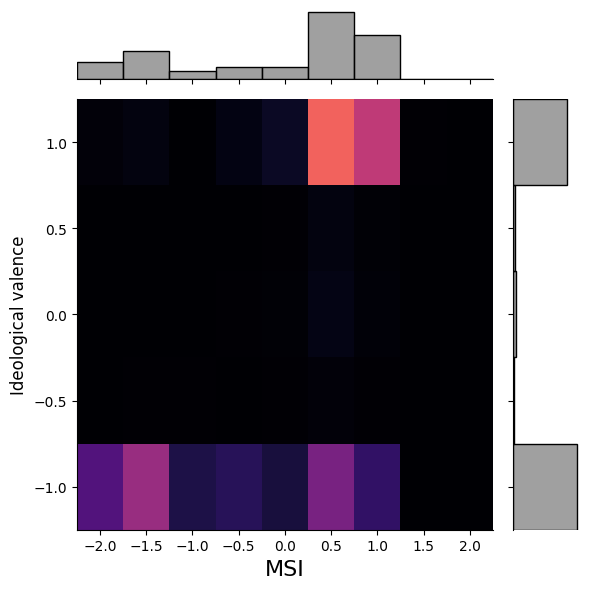

In [53]:
plt.figure(dpi = 300, figsize=(5,5))

ax1 = sns.jointplot(x = users_opinion_score['score'], y = users_opinion_score['opinion_valence'], marginal_kws=dict(bins = np.arange(-2.25, 2.26, 0.50)),color='grey')
ax1.ax_joint.cla()
plt.sca(ax1.ax_joint)
plt.hist2d(users_opinion_score['score'], users_opinion_score['opinion_valence'], bins = [np.arange(-2.25, 2.26, 0.50), np.arange(-1.25, 1.26, 0.50)], cmap = 'magma', vmin = 0.00, vmax = 10000) #norm=mcolors.PowerNorm(0.3), cmap = 'magma')

#plt.xlim(np.quantile(users_opinion_score['score'].to_list(), q = [0.005, 0.995]) + [-0.65, 0.65])
#plt.ylim([-1.25, 1.25])
plt.xlabel('MSI', size = 16)
plt.ylabel('Ideological valence', size = 12)
plt.tight_layout()
plt.savefig('Results/MSI_ideology_valence.png')
plt.savefig('Results/MSI_ideology_valence.pdf')
plt.show()

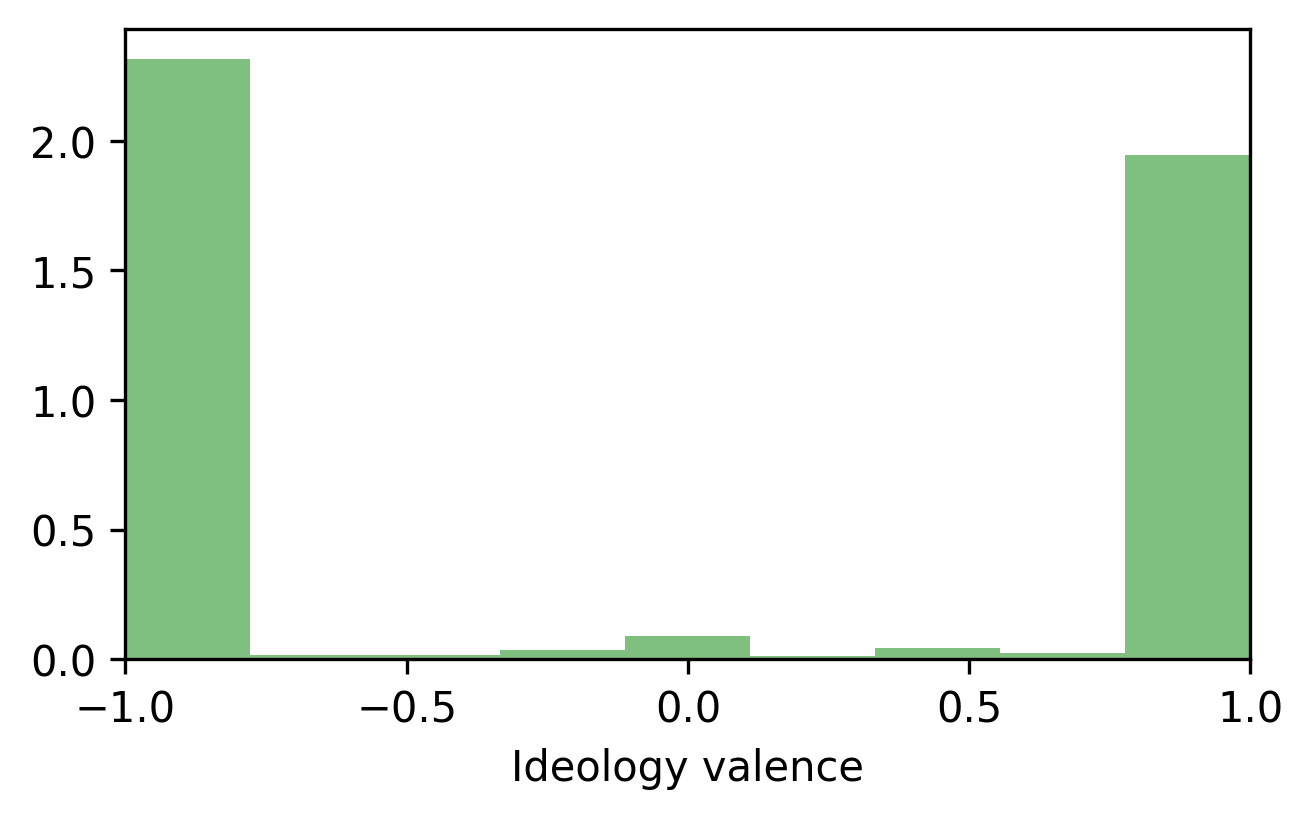

In [20]:
# Scores of the users
plt.figure(dpi = 300, figsize = (5,3))
plt.axes([0.15, 0.25, 0.75, 0.70])
plt.hist(users_opinion_score['opinion_valence'], bins = 9, alpha = 0.50, color = 'g', density = True)
plt.xlim([-1, 1])
plt.xlabel(r'Ideology valence', size = 10)
plt.xticks(np.arange(-1, 1.01, 0.5))
plt.savefig('Results/Ideology_valence.png')
plt.savefig('Results/Ideology_valence.pdf')
plt.show()

In [22]:
users_opinion_score.to_csv('Users_ideological_valence.csv', index = False)